torch.Size([25, 2])


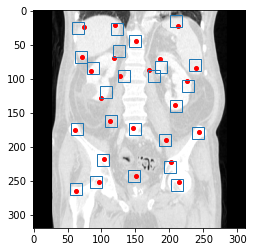

pixel error own eval tensor(5.3639)
Prediction is computed  in C++ via the own evaluation function, which seems to give slightly higher pixel errors then the given one.


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

prediction = torch.load('predicted_coordinates.pth')
print(prediction.shape)

data = torch.load('../uebung6_data.pth')
img_train = data['img_train']
pts_train = data['pts_train']
img_test = data['img_test']
pts_test = data['pts_test']
ground_truth = data['ground_truth'] 

#convert coordinates from -1 to +1 (only required for plotting)
coordinates_train = (pts_train+1)*torch.Tensor([312-1,320-1]).view(1,1,1,2)/2
coordinates_test = (pts_test+1)*torch.Tensor([312-1,320-1]).view(1,1,1,2)/2

plt.imshow(torch.clamp(img_test[0,:,:,:],-200,1200).squeeze(),'gray')
plt.plot(coordinates_test[0,:,0,0].numpy(),coordinates_test[0,:,0,1].numpy(),'r.',linewidth=1.5, markersize=8)
plt.plot(prediction[:,0].numpy(),prediction[:,1].numpy(),'s',linewidth=4, markersize=12, markerfacecolor='none')
plt.show()

pix_error2 = torch.sqrt(torch.sum((coordinates_test[0,:,0,:]-prediction[ground_truth,:])**2,1))
print('pixel error own eval', pix_error2.mean())
print("Prediction is computed  in C++ via the own evaluation function, which seems to give slightly higher pixel errors then the given one.")